In [1]:
pip install praw

In [2]:
import praw
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
reddit = praw.Reddit(client_id='QHdGeZaYJfEzVQ', client_secret='wB-rAU3ZPOTZylLxUQas-QBszyk', user_agent='somya')
subreddit = reddit.subreddit('india')

In [4]:
flair_dict={'Political','Non-political','Reddiquette','AskIndia','Science & Technology','Policy & Economy','Finance & Business','Sports and food','Photography','AMA'}

In [5]:
# Function to convert timestamp to datetime
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [6]:
topics_dict = { "title":[],"score":[],"id":[],"url":[],"comms_num": [],"created": [],"body":[],"flair":[]}
for flair in flair_dict:
    for submission in subreddit.search(flair,limit=1000):
        topics_dict["title"].append(submission.title)
        topics_dict["score"].append(submission.score)
        topics_dict["id"].append(submission.id)
        topics_dict["url"].append(submission.url)
        topics_dict["comms_num"].append(submission.num_comments)
        topics_dict["created"].append(submission.created)
        topics_dict["body"].append(submission.selftext)
        topics_dict["flair"].append(flair)

data = pd.DataFrame(topics_dict)
len(data['title'])

1963

In [7]:
data.tail(10)

,title,score,id,url,comms_num,created,body,flair
1953,Mega Discussion thread: Demands for Grants 201...,42,333ipd,https://www.reddit.com/r/india/comments/333ipd...,17,1.429446e+09,"Hello /r/india,\n\nI thought it would be an in...",Policy & Economy
1954,India Security News Weekly: Edition 4 - June 03,26,6f2il1,https://www.reddit.com/r/india/comments/6f2il1...,2,1.496541e+09,Security Underflow (and this newsletter) is an...,Policy & Economy
1955,A possible reason why India is yet to achieve ...,20,5bsjf0,https://www.reddit.com/r/india/comments/5bsjf0...,5,1.478631e+09,Any stable form of government distributes its ...,Policy & Economy
1956,Nehru! Why do you like / dislike / hate / love...,11,2kh7n5,https://www.reddit.com/r/india/comments/2kh7n5...,46,1.414457e+09,"Thanks /u/parlor_tricks, our conversation trig...",Policy & Economy
1957,Whats wrong with Economic Times?,24,6ze0dd,https://www.reddit.com/r/india/comments/6ze0dd...,1,1.505145e+09,"Lately, I have been noticing that all the good...",Policy & Economy
1958,The curious case of the rotting grains: an att...,127,t8q12,https://www.reddit.com/r/india/comments/t8q12/...,37,1.336276e+09,Hey r/india. The [recent post on the rotting g...,Policy & Economy
1959,Lets support Demonetization for a moment.,0,5kci5l,https://www.reddit.com/r/india/comments/5kci5l...,14,1.482763e+09,i have seen country burned many times... this ...,Policy & Economy
1960,"New amnesty scheme levies 31% effective tax, C...",9,4ugg4o,https://www.reddit.com/r/india/comments/4ugg4o...,8,1.469444e+09,It's not 45% silly.. It's 31%.. Plus bonus is ...,Policy & Economy
1961,How would Arvind Kejriwal the PM would handle ...,0,406jpm,https://www.reddit.com/r/india/comments/406jpm...,34,1.452380e+09,It is a common feeling amongst even BJP suppor...,Policy & Economy
1962,[FoodForThough]the Brexit shows why India real...,1,4q7svu,https://www.reddit.com/r/india/comments/4q7svu...,21,1.467120e+09,"When youre sick you go to a doctor for help, t...",Policy & Economy


In [8]:
# Converting timestamp to datetime format
_timestamp = data["created"].apply(get_date)
data = data.assign(timestamp = _timestamp)
del data['created']

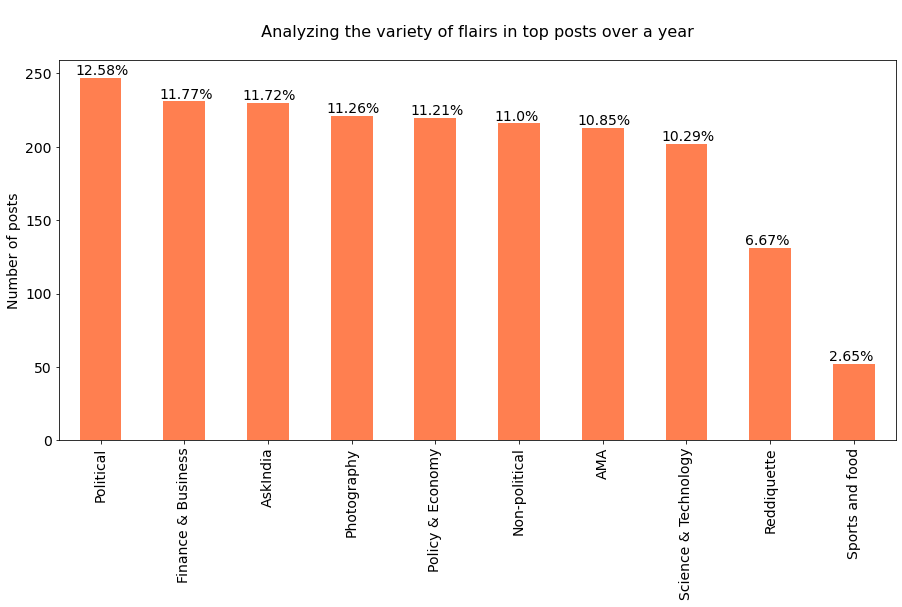

In [9]:
plot = data['flair'].value_counts().plot(kind='bar', figsize=(15,7), color="coral", fontsize=14);
plot.set_title("\n Analyzing the variety of flairs in top posts over a year \n", fontsize=16)
plot.set_ylabel("Number of posts", fontsize=14);

# Find the values and their sum
totals = []
for i in plot.patches:
    totals.append(i.get_height())
total = np.sum(totals)

# Set individual bar lables using above list
for i in plot.patches:
    # get_x pulls left or right; get_height pushes up or down
    plot.text(i.get_x()-0.05, i.get_height()+ 2, str(round((i.get_height()/total)*100, 2))+'%', fontsize=14)

In [10]:
new=pd.read_csv('/content/drive/My Drive/reddit_data.csv')
new

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body,created,flair
0,0,"Attractive men, what type of attention do you ...",20,cprtaa,india,https://www.reddit.com/r/india/comments/cprtaa...,21,"xposted from /r/askmen, posted here because In...",1.565725e+09,AskIndia
1,1,[askindia] My brothers bank account was hacked...,42,dacmel,india,https://www.reddit.com/r/india/comments/dacmel...,64,My brother received bunch of SMS this morning ...,1.569682e+09,AskIndia
2,2,[AskIndia] What song is this ?,5,comakt,india,https://www.reddit.com/r/india/comments/comakt...,6,Often when I think of home there is a particul...,1.565493e+09,AskIndia
3,3,[AskIndia][Serious] Is it worth attempting imm...,55,c4ilk5,india,https://www.reddit.com/r/india/comments/c4ilk5...,115,Title. \n\nFrom what I understand based on arm...,1.561382e+09,AskIndia
4,4,[AskIndia] What are some cheap but reliable an...,21,dpmgmj,india,https://www.reddit.com/r/india/comments/dpmgmj...,25,I won't play games or edit videos.\n\nI will u...,1.572552e+09,AskIndia
...,...,...,...,...,...,...,...,...,...,...
2505,2505,MASAAN director Neeraj Ghaywan here. I'm here ...,207,3f10la,india,https://www.reddit.com/r/india/comments/3f10la...,198,Thank you for taking time out guys. I *really*...,1.438207e+09,AMA
2506,2506,"[AMAA] I just got scammed out of Rs 51,000 AMA!",186,2kvbea,india,https://www.reddit.com/r/india/comments/2kvbea...,338,"Like I said, I thought I was paying Rs 50k (ad...",1.414776e+09,AMA
2507,2507,r/IndiaInvestments is having an AMA with Gaura...,17,8hy5eh,india,https://www.reddit.com/r/india/comments/8hy5eh...,6,https://np.reddit.com/r/IndiaInvestments/comme...,1.525826e+09,AMA
2508,2508,"Hi r/India, I'm Nikhil Pahwa. AMA!",79,4vm9nk,india,https://www.reddit.com/r/india/comments/4vm9nk...,95,"Hi, I'm Nikhil Pahwa, /u/atnixxin, and I compl...",1.470084e+09,AMA


In [11]:
# Function to convert timestamp to datetime
def get_date(created):
    return dt.datetime.fromtimestamp(created)
# Converting timestamp to datetime format
_timestamp = new["created"].apply(get_date)
new = new.assign(timestamp = _timestamp)
del new['created']

In [12]:
new=new.rename(columns={'num_comments': 'comms_num'})

In [13]:
new.drop(['subreddit','Unnamed: 0'],axis=1, inplace=True)

In [14]:
dictionary={'Politics' : 'Political','Non-Political': 'Non-political','Reddiquette': 'Reddiquette','AskIndia': 'AskIndia','Science/Technology': 'Science & Technology','Policy/Economy' : 'Policy & Economy','Business/Finance': 'Finance & Business','Sports': 'Sports and food', 'Food': 'Sports and food', 'Photography': 'Photography', 'AMA': 'AMA'}

In [15]:
new['flair']=new['flair'].map(dictionary)

In [16]:
new['flair'].isnull().sum()

234

In [17]:
df=pd.concat([data, new]).reset_index(drop=True)

In [18]:
df.drop_duplicates(subset ='id', 
                     keep = 'first', inplace = True)

In [19]:
df['flair'].isnull().sum()

216

In [20]:
df.dropna(subset=['flair'], inplace=True)

In [21]:
df['flair'].isnull().sum()

0

In [22]:
df.reset_index(drop=True)

,title,score,id,url,comms_num,body,flair,timestamp
0,Covid 19 - Parliamentary Standing Committee on...,4,fyad3a,https://www.reddit.com/r/india/comments/fyad3a...,0,The Parliamentary Standing Committee on Scienc...,Science & Technology,2020-04-10 14:48:16
1,[NP]FIITJEE - An institute that is supposed to...,251,7h8luq,https://i.redd.it/cex76h7a2o101.jpg,61,,Science & Technology,2017-12-03 16:19:29
2,What are the websites that cover science & tec...,20,5vouxk,https://www.reddit.com/r/india/comments/5vouxk...,16,"Like verge.com, wired.com etc.",Science & Technology,2017-02-23 14:27:51
3,[Science & Technology] The secret to longevity...,2,8o1enm,https://www.mcgill.ca/newsroom/channels/news/s...,2,,Science & Technology,2018-06-02 23:43:55
4,[Science & Technology] 20 important discoverie...,30,7hhkem,https://a.msn.com/r/2/BBG3HPi?m=en-in,0,,Science & Technology,2017-12-04 22:16:18
...,...,...,...,...,...,...,...,...
2806,AMA Announcement: Sanjeev Sabhlok from the Swa...,22,9mxnv9,https://www.reddit.com/r/india/comments/9mxnv9...,0,"Hi /r/india, \n\nMr. Sanjeev Sabhlok, a former...",AMA,2018-10-10 16:32:18
2807,"[NP] r/India, what's bothering you? I'm here t...",27,4rhdqd,https://www.reddit.com/r/india/comments/4rhdqd...,178,Let's hear it.,AMA,2016-07-06 15:35:35
2808,"Hi r/India, I am Kumaran Mahalingam, a Geologi...",111,5szty8,https://www.reddit.com/r/india/comments/5szty8...,40,I'm a Geologist passionate about Standup-Paddl...,AMA,2017-02-09 20:58:51
2809,r/IndiaInvestments is having an AMA with Gaura...,17,8hy5eh,https://www.reddit.com/r/india/comments/8hy5eh...,6,https://np.reddit.com/r/IndiaInvestments/comme...,AMA,2018-05-09 00:40:36


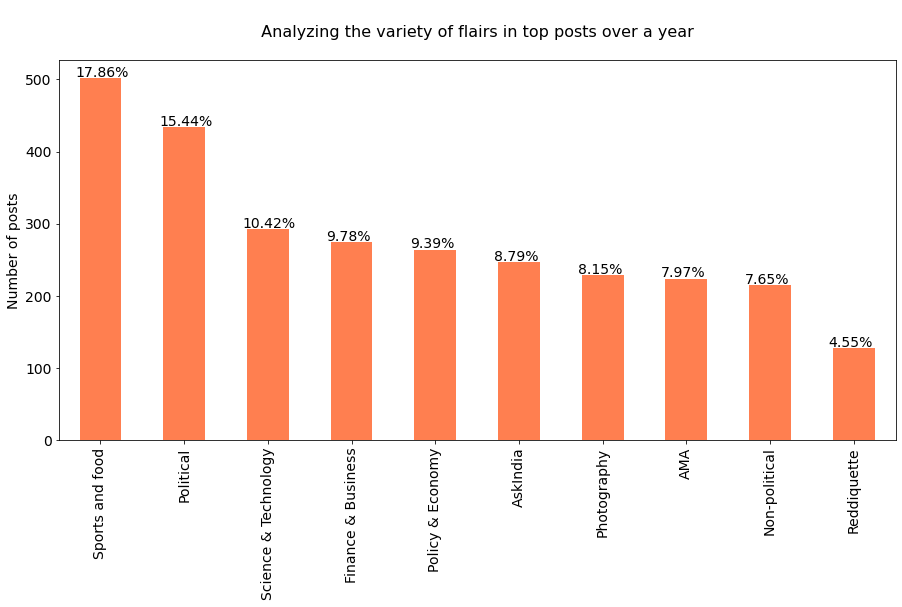

In [23]:
plot = df['flair'].value_counts().plot(kind='bar', figsize=(15,7), color="coral", fontsize=14);
plot.set_title("\n Analyzing the variety of flairs in top posts over a year \n", fontsize=16)
plot.set_ylabel("Number of posts", fontsize=14);

# Find the values and their sum
totals = []
for i in plot.patches:
    totals.append(i.get_height())
total = np.sum(totals)

# Set individual bar lables using above list
for i in plot.patches:
    # get_x pulls left or right; get_height pushes up or down
    plot.text(i.get_x()-0.05, i.get_height()+ 2, str(round((i.get_height()/total)*100, 2))+'%', fontsize=14)

In [24]:
df.describe()

,score,comms_num
count,2811.000000,2811.000000
mean,148.152970,67.705799
std,558.629089,459.185975
min,0.000000,0.000000
25%,9.000000,4.000000
50%,29.000000,13.000000
75%,108.000000,46.000000
max,18435.000000,10960.000000


In [25]:
df.to_csv('dataset.csv',index=False)